In [1]:
from pathlib import Path
import astropy.units as u
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/positionswitch/data/AGBT05B_047_01/AGBT05B_047_01.raw.acs/AGBT05B_047_01.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

Starting download...
AGBT05B_047_01.raw.acs.fits already downloaded at /users/esmith/Git/dysh/notebooks/examples/data


In [3]:
sdfits = GBTFITSLoad(filename)

In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,51,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,198.343112,18.64274
1,52,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,198.930571,18.787219
2,53,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,199.330491,18.356075
3,54,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,199.915725,18.492742
4,55,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,200.304237,18.057533
5,56,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,200.890603,18.186034
6,57,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,202.327548,17.385267
7,58,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,202.919161,17.494902


In [5]:
ps_scan_block = sdfits.getps(scan=51, ifnum=0, plnum=0)

 ID TAG OBJECT BANDWID DATE-OBS DURATION EXPOSURE TSYS TDIM7 TUNIT7 ... NSAVE HDU BINTABLE ROW PROC _OBSTYPE _SUBOBSMODE CHAN UTC # SELECTED
--- --- ------ ------- -------- -------- -------- ---- ----- ------ ... ----- --- -------- --- ---- -------- ----------- ---- --- ----------


 ID    TAG      SCAN   IFNUM PLNUM # SELECTED
--- --------- -------- ----- ----- ----------
  0 76f386e98 [51, 52]     0     0         44


In [6]:
print(f"T_sys = {ps_scan_block[0].tsys.mean():.2f}")

T_sys = 19.36


In [7]:
ta = ps_scan_block.timeaverage(weights='tsys')

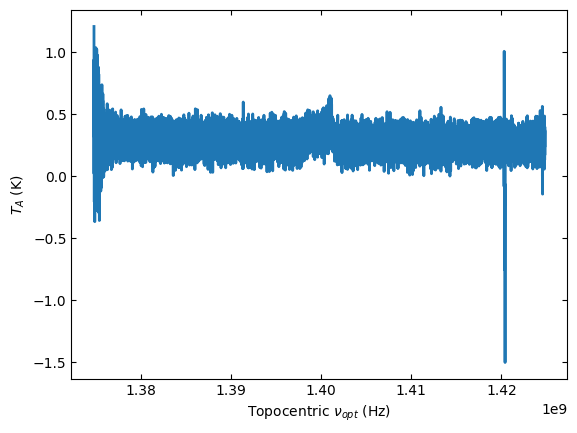

In [8]:
ta.plot()

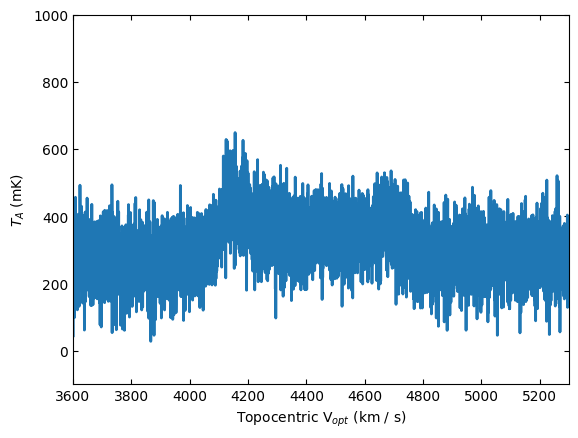

In [9]:
ta.plot(xaxis_unit="km/s", yaxis_unit="mK", ymin=-100, ymax=1000, xmin=3600, xmax=5300)

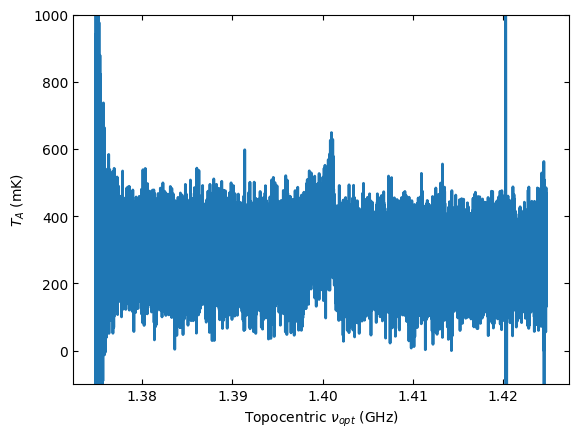

In [10]:
ta.plot(xaxis_unit="GHz", ymin=-100, ymax=1000, yaxis_unit="mK")

In [11]:
kms = u.km/u.s
ta.baseline(model="poly", degree=2, exclude=[3800*kms,5000*kms], remove=True)

EXCLUDING [Spectral Region, 1 sub-regions:
  (1397103816.4779327 Hz, 1402626103.134255 Hz) 
]


 [astropy.modeling.fitting]


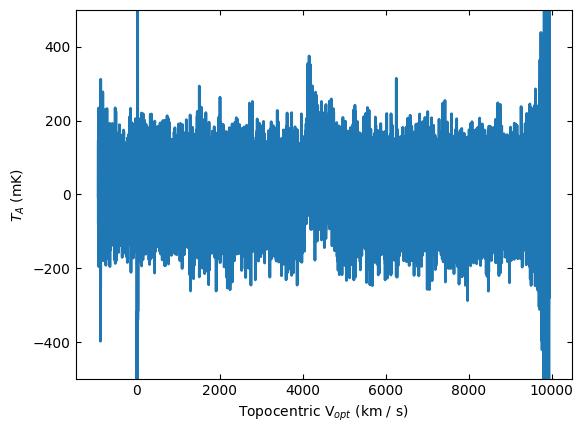

In [12]:
ta.plot(xaxis_unit="km/s", yaxis_unit="mK", ymin=-500, ymax=500)

In [13]:
print(ta.baseline_model)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
            c0                   c1                    c2         
            K                  K / Hz               K / Hz2       
    ------------------ ---------------------- --------------------
    1.6463452183080192 -9.793516886548451e-10 -7.1325412756222e-37


In [14]:
output_dir = Path.cwd() / "output"
ta.savefig(output_dir / "baselined_removed.png")

In [15]:
sdfits.select(scan=[51,52], ifnum=0)
sdfits.selection.show()

 ID    TAG      SCAN   IFNUM # SELECTED
--- --------- -------- ----- ----------
  0 2c4cf7b1b [51, 52]     0         88


In [16]:
sb = sdfits.getps(plnum=0)

 ID    TAG      SCAN   IFNUM # SELECTED
--- --------- -------- ----- ----------
  0 2c4cf7b1b [51, 52]     0         88


 ID    TAG      SCAN   IFNUM PLNUM # SELECTED
--- --------- -------- ----- ----- ----------
  0 2c4cf7b1b [51, 52]     0               88
  1 4a182f785 [51, 52]   [0]     0         44


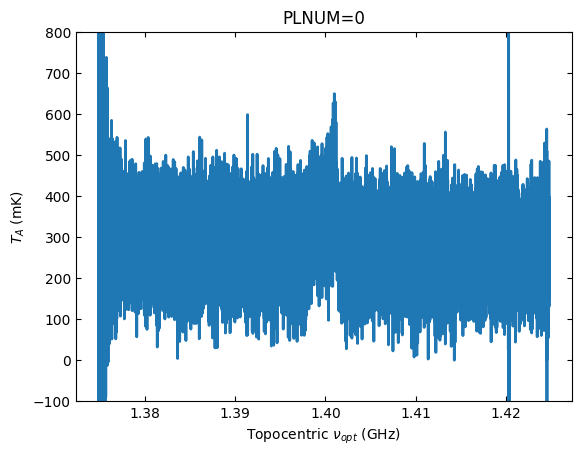

In [17]:
ta2 = sb.timeaverage(weights='tsys')
ta2.plot(xaxis_unit="GHz", ymin=-100, ymax=800, yaxis_unit="mK", title="PLNUM=0")

 ID    TAG      SCAN   IFNUM # SELECTED
--- --------- -------- ----- ----------
  0 2c4cf7b1b [51, 52]     0         88


 ID    TAG      SCAN   IFNUM PLNUM # SELECTED
--- --------- -------- ----- ----- ----------
  0 2c4cf7b1b [51, 52]     0               88
  1 4a182f785 [51, 52]   [0]     1         44


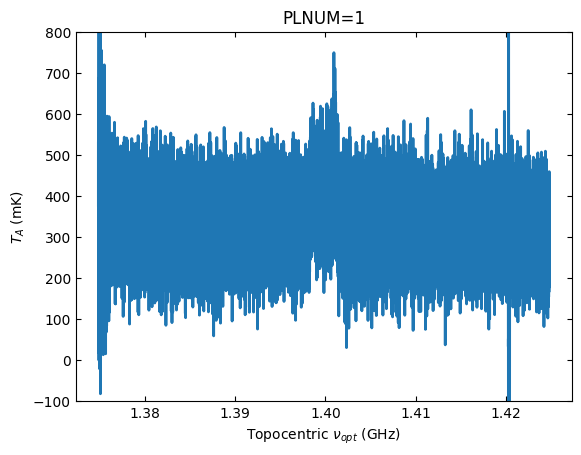

In [18]:
sb = sdfits.getps(plnum=1)
ta3 = sb.timeaverage(weights='tsys')
ta3.plot(xaxis_unit="GHz", ymin=-100, ymax=800, yaxis_unit="mK", title="PLNUM=1")

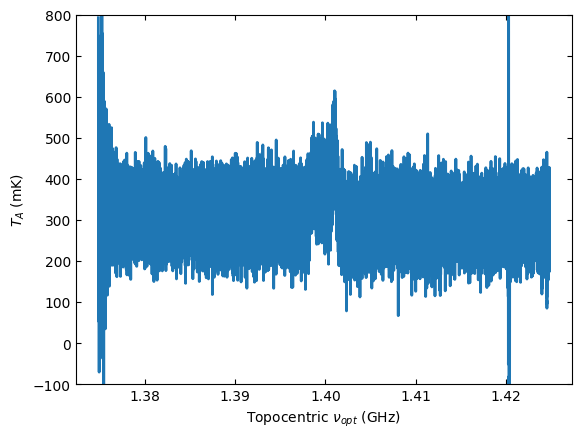

In [19]:
avg = ta2 + ta3
avg *= 0.5
avg.plot(ymin=-100, ymax=800, yaxis_unit="mK", xaxis_unit="GHz")

In [20]:
sdfits.selection.clear()

In [21]:
ps_scan_block_0 = sdfits.getps(ifnum=0, plnum=0)
ps_ta_0 = ps_scan_block_0.timeaverage(weights='tsys')
ps_ta_0.baseline(model="poly", degree=2, exclude=[3800*kms,5000*kms], remove=True)

 ID TAG OBJECT BANDWID DATE-OBS DURATION EXPOSURE TSYS TDIM7 TUNIT7 ... NSAVE HDU BINTABLE ROW PROC _OBSTYPE _SUBOBSMODE CHAN UTC # SELECTED
--- --- ------ ------- -------- -------- -------- ---- ----- ------ ... ----- --- -------- --- ---- -------- ----------- ---- --- ----------


 ID    TAG                  SCAN               IFNUM PLNUM # SELECTED
--- --------- -------------------------------- ----- ----- ----------
  0 76f386e98 [51, 52, 53, 54, 55, 56, 57, 58]     0     0        176


EXCLUDING [Spectral Region, 1 sub-regions:
  (1397103816.4779327 Hz, 1402626103.134255 Hz) 
]


 [astropy.modeling.fitting]


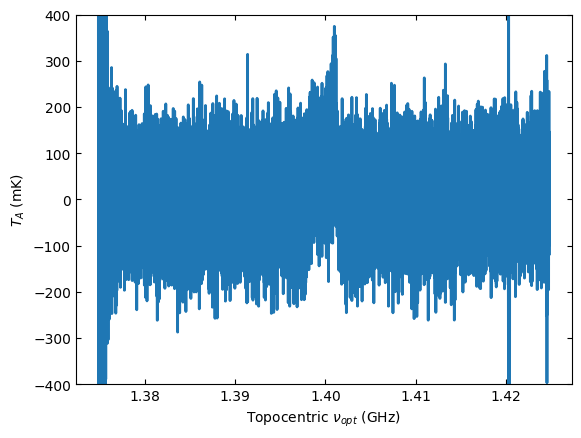

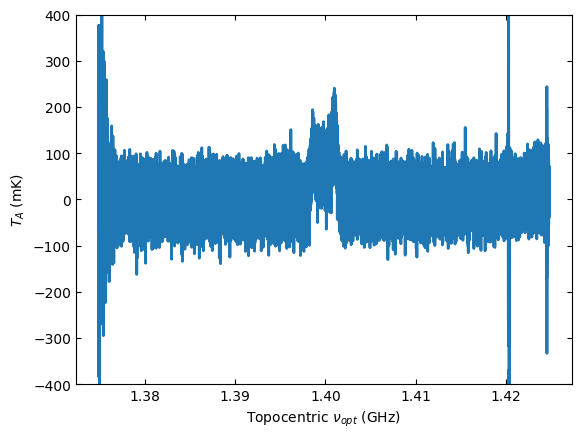

In [22]:
ta.plot(ymin=-400, ymax=400, yaxis_unit="mK", xaxis_unit="GHz")
ps_ta_0.plot(ymin=-400, ymax=400, yaxis_unit="mK", xaxis_unit="GHz")